In [1]:
#Clustering Analysis -> to find natural grouping in the data
#Category of Unsupervised Learning,


In [2]:
#K-Means Clustering -> Prototype based clustering

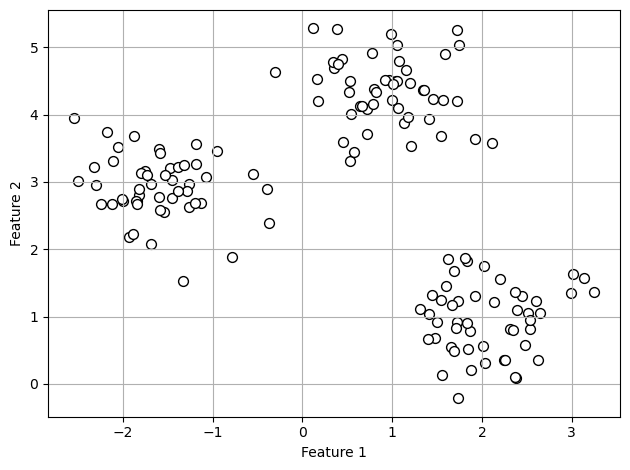

In [4]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 150, n_features = 2, centers = 3, cluster_std=0.5, shuffle=True, random_state=0)

import matplotlib.pyplot as plt

plt.scatter(
    X[:,0],
    X[:,1],
    c = 'white',
    marker = 'o',
    edgecolor = 'black',
    s=50
)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.tight_layout()
plt.show()

In [6]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,
           init = 'random',
           n_init = 10, #n_init -> runs the algo 10 times
           max_iter = 300, # max number of iteration each time the algorithm is ran
           tol = 1e-04, #Tolerance. 
           random_state=0)

y_km = km.fit_predict(X)

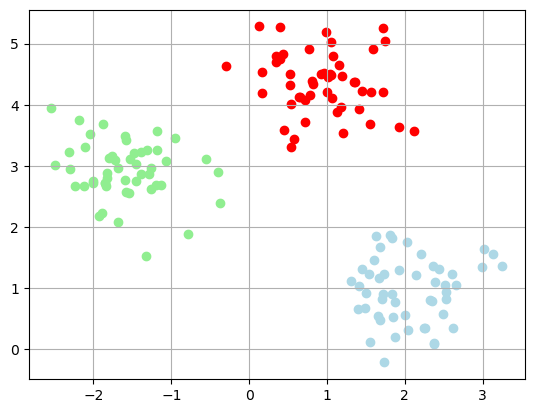

In [9]:
plt.scatter(X[y_km == 0, 0],
           X[y_km == 0, 1], c = 'lightgreen')

plt.scatter(X[y_km == 1, 0],
           X[y_km == 1, 1], c = 'red')

plt.scatter(X[y_km == 2, 0],
           X[y_km == 2, 1], c = 'lightblue')

plt.grid()


In [10]:
#Kmeans++: way to determine the amount of centroids

#Hard clustering -> each and every dataset is assigned to a cluster
#Soft/fuzzy clustering -> not all points are assigned to a cluster.
#C-Means -> soft clustering


In [11]:
#Elbow method -> tp find optimum amount of clusters

#SSE -> to compare performace of k-means

#Plot number of clusters on x-axis and SSE on y
#Where SSE stops decreasing rapidly -> near optimum amount of SSE
km.inertia_

72.47601670996696

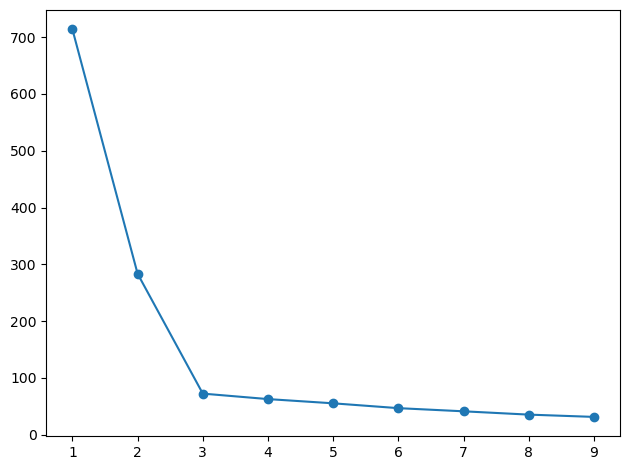

In [13]:
distortions = []

for i in range(1, 10):
    kms = KMeans(n_clusters=i,
           init = 'random',
           n_init = 10, #n_init -> runs the algo 10 times
           max_iter = 300, # max number of iteration each time the algorithm is ran
           tol = 1e-04, #Tolerance. 
           random_state=0)
    
    kms.fit(X)
    distortions.append(kms.inertia_)
    
plt.plot(range(1, 10), distortions, marker = 'o')
plt.tight_layout()
plt.show()
    
    

In [14]:
#Silhoutte plot -> another way to identify the quality of a clustering 
# For all the clusters, the height and width needs to be similar for a good clustering 

In [15]:
# Hierachal Clustering -> aims to create a tree like structure
# Divisive -> Start with one cluster that has all the datapoints, and keep breaking it down till left one singular data point

# Agglomerative -> Opposite

# Single Linkage -> compute distances between most similar member for each pair of clusters, and merge the 
# ones with least distance

# Complete Linkage -< compute distances between the most dismilar member of each pair of clusters, and merge the
# Ones with the least distance



In [16]:
import pandas as pd
import numpy as np

np.random.seed(123)

variables = ["X", 'Y', 'Z']

labels = ['ID_0','ID_1','ID_2','ID_3', 'ID_4']

X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [26]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
labels = ac.fit_predict(X)
print(labels)

[2 0 0 1 2]


/home/pranav/.local/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


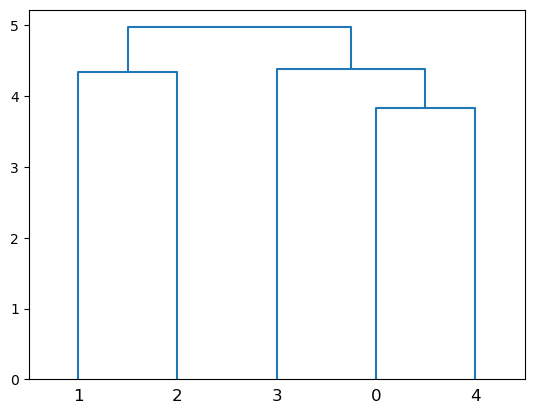

In [25]:
from scipy.cluster import hierarchy

clusters = hierarchy.linkage(df, method='single', )

dendrogram = hierarchy.dendrogram(clusters)


In [ ]:
#DBSCAN -> Dense region of points within a specified radius

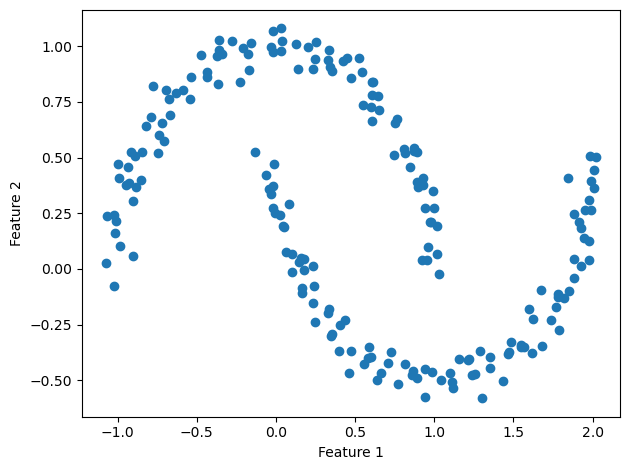

In [27]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 200, noise = 0.05, random_state=0)

plt.scatter(X[:,0], X[:,1])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()
plt.show()

#Example to compare DBSCAN and KMeans 

/home/pranav/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


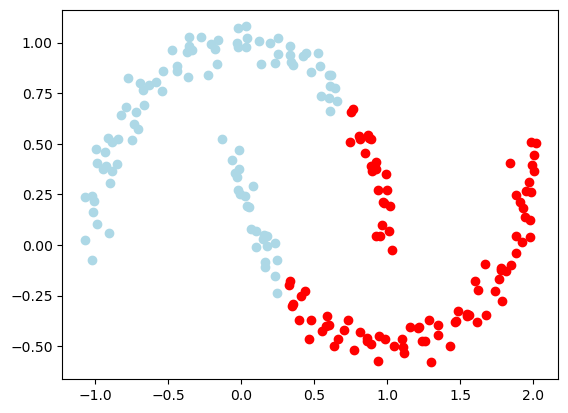

In [36]:
from sklearn.cluster import KMeans

KmeansMoon = KMeans(n_clusters=2, )
yPredict = KmeansMoon.fit_predict(X)
plt.scatter(X[yPredict == 0, 0], X[yPredict == 0, 1], c = 'lightblue')
plt.scatter(X[yPredict == 1, 0], X[yPredict == 1, 1], c = 'red')



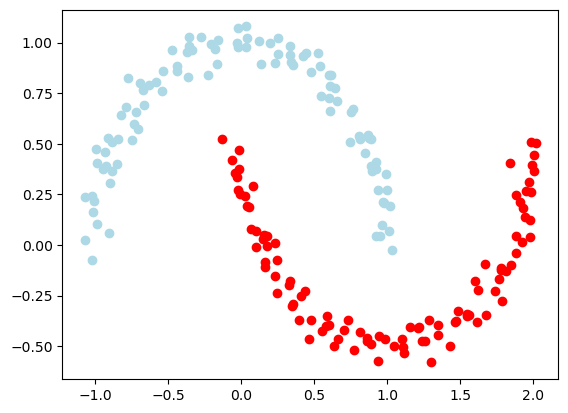

In [56]:
#Kmeans not able to classify the moons because Kmeans assumes circular clusters

from sklearn.cluster import DBSCAN

MoonDBScan = DBSCAN(eps = 0.33)

yDBPred = MoonDBScan.fit_predict(X)

plt.scatter(X[yDBPred == 0, 0], X[yDBPred == 0, 1], c = 'lightblue')
plt.scatter(X[yDBPred == 1, 0], X[yDBPred == 1, 1], c = 'red')

In [38]:
yDBPred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])